## Introduction to the Feed-forward neural networks

#### Section 1: Understanding Feed Forward Neural Networks

<i>A Feed Forward Neural Network is the simplest type of artificial neural network. In this network, the information moves in only one direction—forward—from the input nodes, through the hidden nodes (if any), and to the output nodes. There are no cycles or loops in the network.</i>

### Structure of a Feedforward Neural Network


1. Input Layer: The input layer consists of neurons that receive the input data. Each neuron in the input layer represents a feature of the input data.
2. Hidden Layers: One or more hidden layers are placed between the input and output layers. These layers are responsible for learning the complex patterns in the data. Each neuron in a hidden layer applies a weighted sum of inputs followed by a non-linear activation function.
3. Output Layer: The output layer provides the final output of the network. The number of neurons in this layer corresponds to the number of classes in a classification problem or the number of outputs in a regression problem.

Each connection between neurons in these layers has an associated weight that is adjusted during the training process to minimize the error in predictions.

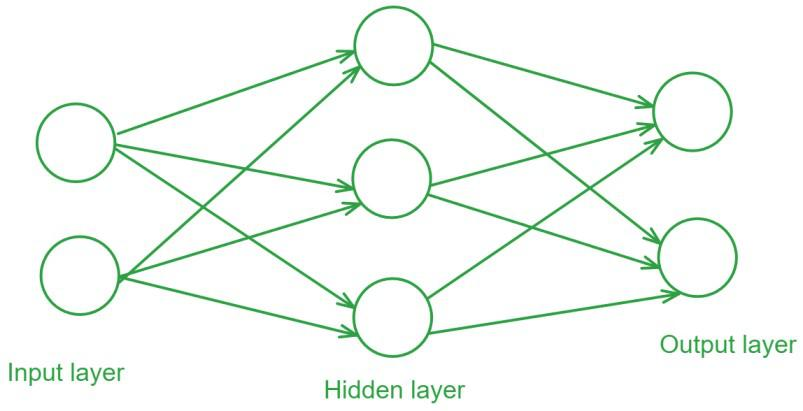

source: https://www.geeksforgeeks.org/

The network consists of an input layer, one or more hidden layers, and an output layer. Each layer is made up of neurons, and each neuron in one layer is connected to every neuron in the next layer, hence the term 'fully connected'.


#### Section2:  Setting Up the Environment

Now that we have a basic understanding of Feed Forward Neural Networks, let's set up our coding environment. We'll be using NumPy for our implementation. Make sure you have Python and NumPy installed. You can find the installation instructions in the description below:


In [61]:
# installing the numpy
!pip install numpy


#### Section 3: Implementing Feed Forward Neural Networks in NumPy

Let's start by importing the necessary libraries

In [62]:
import numpy as np


### Activation Function


Activation functions introduce non-linearity into the network. One of the most commonly used activation functions is the sigmoid function. The sigmoid function is defined as:

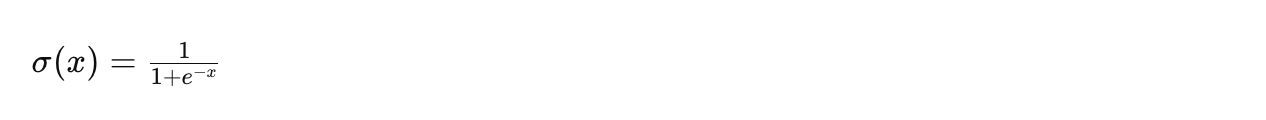

Its derivative, which is crucial for backpropagation, is:

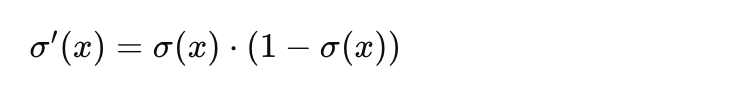

Next, we will define our activation functions and their derivatives. We'll use the sigmoid function for this example.

In [63]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


Let's define our Feed Forward Neural Network class by initializing it with the number of neurons in each layer and random weights and biases.

In [64]:
class FeedForwardNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # initializing the weights
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)


        # initializing the biases
        self.bias_hidden = np.random.rand(1, self.hidden_size)
        self.bias_output = np.random.rand(1, self.output_size)
        



Next, we will implement the forward pass method, which calculates the output of the network

In [65]:
def forward(self, input_data):
    """This function is used to forward the input data through the network"""

    # input to hidden layer
    self.hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
    self.hidden_output = sigmoid(self.hidden_input)

    # hidden to output layer
    self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
    self.final_output = sigmoid(self.final_input)

    return self.final_output



Now, let's implement the backpropagation method, which updates the weights and biases based on the error.

Backpropagation is an algorithm used to train neural networks by adjusting the weights and biases to minimize the error between the predicted output and the actual target output. It works by propagating the error backward through the network, layer by layer, to update the model parameters.


In [66]:
def backward(self, input_data, target_output, learning_rate):
    """this function is used to backpropagate the error and update the weights"""

    # calculating the error
    output_error = target_output-self.final_output
    output_delta  = output_error * sigmoid_derivative(self.final_output)



    #The sigmoid derivative helps scale the error based on how sensitive the output is to changes in the input. 
    # This step calculates the gradient of the error with respect to the output, indicating how much each neuron's output contributed to the overall error.
    
    #calculating the hidden layer error
    hidden_error = output_delta.dot(self.weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

    # update the weights and biases 
    self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
    self.bias_output += np.sum(output_delta) * learning_rate
    self.weights_input_hidden += input_data.T.dot(hidden_delta) * learning_rate
    self.bias_hidden += np.sum(hidden_delta) * learning_rate
    

### Weights Update:

The weights between layers are updated by adding the product of the transposed output of the previous layer and the delta (gradient of the error) of the current layer, scaled by the learning rate.
This adjustment reduces the error by modifying the weights based on how much each weight contributed to the error.

### Biases Update:

The biases are updated by adding the sum of the delta (gradient of the error) of the current layer, scaled by the learning rate.
This adjustment reduces the error by modifying the biases.
By performing these updates, the network adjusts its parameters (weights and biases) to minimize the error in its predictions, effectively learning from the data over multiple iterations (epochs).

Now, we'll implement the training method to train the network

In [67]:
def train(self, input_data, target_output, epochs, learning_rate):
    for epoch in range(epochs):
        # Forward pass
        self.forward(input_data)

        # Backward pass and weight updates
        self.backward(input_data, target_output, learning_rate)

        # Optionally print the error at each epoch
        if epoch % 100 == 0:
            loss = np.mean(np.square(target_output - self.final_output))
            print(f'Epoch {epoch}, Loss: {loss:.4f}')

Finally, we'll define the " predict" function 

In [ ]:
def predict(self, input_data):
    probabilities = self.forward(input_data)
    # Apply threshold to get binary classification
    return (probabilities >= 0.5).astype(int)

Here is the complete class for our Feed Forward Neural Network . 

In [68]:
class FeedForwardNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Weights initialization
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

        # Biases initialization
        self.bias_hidden = np.random.rand(1, self.hidden_size)
        self.bias_output = np.random.rand(1, self.output_size)


    def forward(self, input_data):
        # Input to hidden layer
        self.hidden_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        # Hidden layer to output layer
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def backward(self, input_data, target_output, learning_rate):
        # Calculate the error
        output_error = target_output - self.final_output
        output_delta = output_error * sigmoid_derivative(self.final_output)

        # Calculate the hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update the weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += input_data.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate


    def train(self, input_data, target_output, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            self.forward(input_data)

            # Backward pass and weight updates
            self.backward(input_data, target_output, learning_rate)

            # Optionally print the error at each epoch
            if epoch % 100 == 0:
                loss = np.mean(np.square(target_output - self.final_output))
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, input_data):
        probabilities = self.forward(input_data)
        # Apply threshold to get binary classification
        return (probabilities >= 0.5).astype(int)

Now, let's train our neural network on a simple dataset. For demonstration purposes, we will use a small syntheic dataset.

In [69]:
# # Sample data
# input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# target_output = np.array([[0], [1], [1], [0]])  # XOR problem


# Sample data
input_data = np.array([
    [2, 9],  # 2 hours of study, 9 hours of sleep
    [1, 5],  # 1 hour of study, 5 hours of sleep
    [3, 6],  # 3 hours of study, 6 hours of sleep
    [4, 8],  # 4 hours of study, 8 hours of sleep
])
target_output = np.array([[1], [0], [1], [1]])  # Pass or fail (1 = pass, 0 = fail)

# Normalize input data
input_data = input_data / np.amax(input_data, axis=0)

# Initialize and train the network
nn = FeedForwardNeuralNetwork(input_size=2, hidden_size=2, output_size=1)
nn.train(input_data, target_output, epochs=10000, learning_rate=0.1)

# Test the network
output = nn.forward(input_data)
print("Predicted Output:")
print(output)


# # Initialize and train the network
# nn = FeedForwardNeuralNetwork(input_size=2, hidden_size=2, output_size=1)
# nn.train(input_data, target_output, epochs=10000, learning_rate=0.1)

Epoch 0, Loss: 0.1845
Epoch 100, Loss: 0.1820
Epoch 200, Loss: 0.1809
Epoch 300, Loss: 0.1797
Epoch 400, Loss: 0.1780
Epoch 500, Loss: 0.1760
Epoch 600, Loss: 0.1734
Epoch 700, Loss: 0.1700
Epoch 800, Loss: 0.1655
Epoch 900, Loss: 0.1597
Epoch 1000, Loss: 0.1522
Epoch 1100, Loss: 0.1429
Epoch 1200, Loss: 0.1319
Epoch 1300, Loss: 0.1194
Epoch 1400, Loss: 0.1062
Epoch 1500, Loss: 0.0928
Epoch 1600, Loss: 0.0801
Epoch 1700, Loss: 0.0686
Epoch 1800, Loss: 0.0585
Epoch 1900, Loss: 0.0500
Epoch 2000, Loss: 0.0428
Epoch 2100, Loss: 0.0368
Epoch 2200, Loss: 0.0319
Epoch 2300, Loss: 0.0279
Epoch 2400, Loss: 0.0245
Epoch 2500, Loss: 0.0217
Epoch 2600, Loss: 0.0194
Epoch 2700, Loss: 0.0174
Epoch 2800, Loss: 0.0157
Epoch 2900, Loss: 0.0143
Epoch 3000, Loss: 0.0131
Epoch 3100, Loss: 0.0120
Epoch 3200, Loss: 0.0111
Epoch 3300, Loss: 0.0103
Epoch 3400, Loss: 0.0095
Epoch 3500, Loss: 0.0089
Epoch 3600, Loss: 0.0083
Epoch 3700, Loss: 0.0078
Epoch 3800, Loss: 0.0073
Epoch 3900, Loss: 0.0069
Epoch 4000, 

We're training our network on the XOR problem, a classic problem in neural networks. The network should learn to output 0 for [0, 0] and [1, 1], and 1 for [0, 1] and [1, 0]. Let's see the final outputs after training.

In [70]:
# test the network
output =nn.forward(input_data)
print(f"predicted_output: \n{output}")

predicted_output: 
[[0.96048508]
 [0.05356076]
 [0.97345843]
 [0.99132267]]


In [71]:
classified_output = nn.predict(input_data)
print("Classified Output (0 or 1):")
print(classified_output)

Classified Output (0 or 1):
[[1]
 [0]
 [1]
 [1]]
